In [8]:
import gc
import os
import time
import warnings

import cv2
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

warnings.filterwarnings('ignore')

In [9]:
train_dir = "../data/multilabel_modified/images"
train_csv_path = "../data/multilabel_modified/multilabel_classification(2).csv"

In [10]:
train_df = pd.read_csv(train_csv_path)
train_df

,Image_Name,"Classes(motorcycle, truck, boat, bus, cycle, person, desert, mountains, sea, sunset, trees, sitar, ektara, flutes, tabla, harmonium)",motorcycle,truck,boat,bus,cycle,person,desert,mountains,sea,sunset,trees,sitar,ektara,flutes,tabla,harmonium
0,image1.jpg,bus person,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,image2.jpg,sitar,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,image3.jpg,flutes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,image4.jpg,bus trees,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,image5.jpg,bus,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8962,image8964.jpg,trees,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8963,image8965.jpg,trees,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8964,image8966.jpg,trees,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8965,image8967.jpg,trees,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [11]:
train_df["Image_Name"] = train_df["Image_Name"].map(lambda x : os.path.join(train_dir,x))
train_df.head(10)

,Image_Name,"Classes(motorcycle, truck, boat, bus, cycle, person, desert, mountains, sea, sunset, trees, sitar, ektara, flutes, tabla, harmonium)",motorcycle,truck,boat,bus,cycle,person,desert,mountains,sea,sunset,trees,sitar,ektara,flutes,tabla,harmonium
0,../data/multilabel_modified/images/image1.jpg,bus person,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,../data/multilabel_modified/images/image2.jpg,sitar,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,../data/multilabel_modified/images/image3.jpg,flutes,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,../data/multilabel_modified/images/image4.jpg,bus trees,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,../data/multilabel_modified/images/image5.jpg,bus,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,../data/multilabel_modified/images/image6.jpg,sitar ektara tabla,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
6,../data/multilabel_modified/images/image7.jpg,sitar tabla,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,../data/multilabel_modified/images/image8.jpg,sitar ektara tabla,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
8,../data/multilabel_modified/images/image9.jpg,person tabla,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9,../data/multilabel_modified/images/image10.jpg,sitar,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
def data_sanity_check():
    """
        this will check each image file for corrupted or missing and 
        returns index of corrupted / missing files .Doing this will
        prevent us from running into any data errors during training phase .
    """
    idx = []
    start = time.time()
    for i in range(len(train_df)):
        try:
            if len(cv2.imread(train_df.iloc[i,0])) == 3:
                _ = 1
        except:
            idx.append(train_df.iloc[i,0])
    end = time.time()
    print(end-start)
    _ = gc.collect()
    return idx


In [13]:
train_df = train_df.loc[~train_df["Image_Name"].isin(dsc)]

NameError: name 'dsc' is not defined

In [14]:
def plot_img_grid(row,col,train_df):
    k = 1
    fig = plt.figure(figsize=(4*row,3*col))
    for k in range(row*col):
        img = cv2.cvtColor(cv2.imread(train_df.iloc[k,0]),cv2.COLOR_BGR2RGB)
        fig.add_subplot(row,col,k+1)
        plt.imshow(img)
    plt.show()


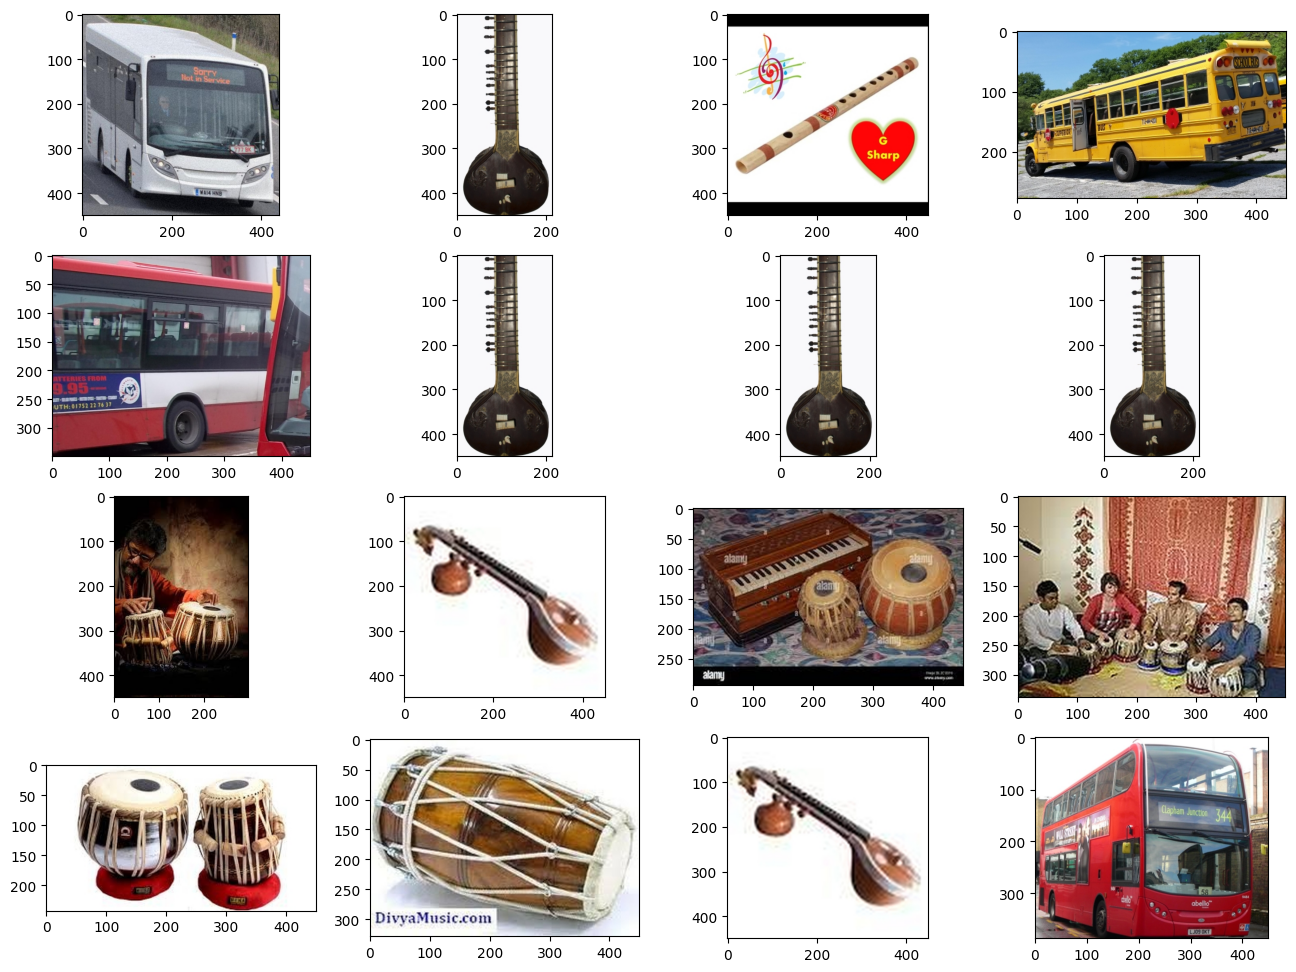

In [15]:
plot_img_grid(4,4,train_df)

In [21]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            '../data/multilabel_modified',
                                            target_size=(150, 150),
                                            batch_size=100,
                                            classes=['test'])

Found 0 images belonging to 1 classes.


In [9]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='sigmoid'))

# print the model summary
model.summary()

2024-05-27 22:51:24.746033: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-27 22:51:24.746088: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-27 22:51:24.746098: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-27 22:51:24.746134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-27 22:51:24.746211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=3, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)